In [1]:
cd ..

/Users/kimyoungh/GoogleDrive/rich/main/rich


In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyupbit

from data_processing.trading_sequence_generator import TradingSequenceGenerator

%load_ext autoreload
%autoreload 2

In [3]:
with open('train_data/trading_bc_transformer/train_dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [4]:
dataset.keys()

dict_keys(['action_series', 'rets_series', 'rew_series', 'val_series', 'date_series', 'observations'])

In [5]:
dataset['date_series']

array(['2021-12-15T11:00:00.000000000', '2021-12-15T12:00:00.000000000',
       '2021-12-15T13:00:00.000000000', ...,
       '2022-12-24T17:00:00.000000000', '2022-12-24T18:00:00.000000000',
       '2022-12-24T19:00:00.000000000'], dtype='datetime64[ns]')

In [6]:
help(pyupbit.get_ohlcv)

Help on function get_ohlcv in module pyupbit.quotation_api:

get_ohlcv(ticker='KRW-BTC', interval='day', count=200, to=None, period=0.1)



In [7]:
price = pyupbit.get_ohlcv('KRW-XRP', interval='minute10',
                        count=24 * 6 * 20 + 144 + (24 * 6 * 10))

In [8]:
price

,open,high,low,close,volume,value
2022-12-02 20:20:00,523.0,524.0,522.0,523.0,7.718919e+05,4.035844e+08
2022-12-02 20:30:00,523.0,525.0,523.0,524.0,6.588050e+05,3.453216e+08
2022-12-02 20:40:00,524.0,525.0,523.0,524.0,9.051101e+05,4.744056e+08
2022-12-02 20:50:00,524.0,525.0,523.0,524.0,7.205638e+05,3.773050e+08
2022-12-02 21:00:00,524.0,525.0,523.0,525.0,4.648886e+05,2.435322e+08
...,...,...,...,...,...,...
2023-01-02 23:00:00,438.0,440.0,437.0,439.0,2.015856e+06,8.848085e+08
2023-01-02 23:10:00,438.0,440.0,438.0,438.0,6.721793e+05,2.951548e+08
2023-01-02 23:20:00,439.0,442.0,439.0,441.0,3.950315e+06,1.739152e+09
2023-01-02 23:30:00,441.0,441.0,439.0,440.0,1.531439e+06,6.739932e+08


In [9]:
rets = np.log(price).diff(1)
rr = rets.rolling(6).sum().dropna()

<AxesSubplot:>

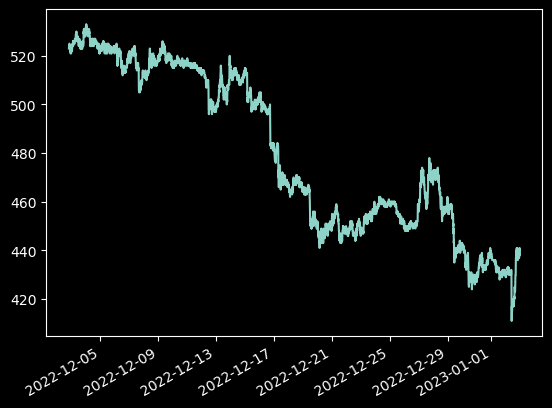

In [10]:
price['close'].plot()

In [11]:
price.shape

(4464, 6)

<AxesSubplot:>

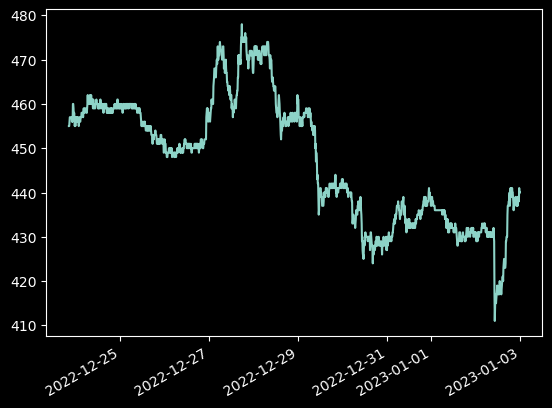

In [12]:
price['close'].iloc[-1440:].plot()

In [13]:
tsg = TradingSequenceGenerator(price, window=144, trading_period=6,
                            fee=0.001, decay=0.99)

In [26]:
dataset = tsg.generate_overall_dataset(
    pick_num=4, sample_num=10, temp=100, rn_calc=False)

best done!


In [27]:
dataset['observations'].shape

(4315, 6, 9)

In [28]:
dataset['action_series'].shape

(4315, 10, 6)

In [29]:
dataset['rets_series'].shape

(4315, 10, 6)

In [30]:
dataset.keys()

dict_keys(['action_series', 'rets_series', 'rew_series', 'val_series', 'date_series', 'observations'])

In [31]:
for key, data in dataset.items():
    print(key, data.shape)

action_series (4315, 10, 6)
rets_series (4315, 10, 6)
rew_series (4315, 10, 6)
val_series (4315, 10, 6)
date_series (4315,)
observations (4315, 6, 9)


<AxesSubplot:>

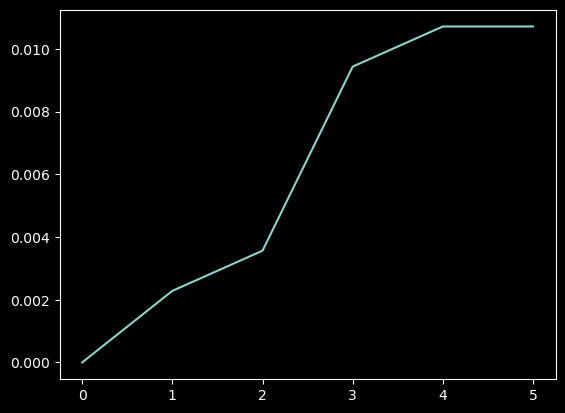

In [36]:
((1 + pd.Series(dataset['rets_series'][-1][4])).cumprod() - 1).plot()

In [54]:
dataset['action_series'][-100]

array([[0, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1]])

In [55]:
dataset['rew_series'][-10][0]

array([1, 1, 0, 1, 0, 0])

In [56]:
for i in range(dataset['rets_series'].shape[0]):
    r = (1 + pd.Series(dataset['rets_series'][i][0])).cumprod() - 1
    print(r.iloc[-1])

0.013228738392294659
0.01219566995131749
0.014105473102169253
0.007347950519349888
0.01025696143571686
0.010251470442911526
0.007451938390496737
0.009352791104441094
0.009359994907811586
0.008352539365724443
0.008359743189894742
0.008366909212772278
0.008366909212772278
0.005579734998746089
0.005572558188616572
0.006577232628745211
0.005572558188616794
0.006577239802732393
0.009367171615743741
0.010375644481233293
0.008472865489743242
0.010356060606060868
0.009340407176231524
0.011230477156624286
0.007428858821448836
0.008311540391936045
0.009317077255419193
0.006541509433962478
0.0046459510357816924
0.0027575187969925974
0.003759398496240518
0.0027645951035781824
0.0027645951035781824
0.0036538391784814994
0.0055439629526581324
0.002655618098473367
0.003657388913347326
0.004663720185119624
0.007457407013838679
0.006564796518886196
0.0036699767093484326
0.004672757427685026
0.004672757427685026
0.006557655954631647
0.004662067148690552
0.008467626722729271
0.009361928203030612
0.010260

In [57]:
for key, data in dataset.items():
    print(key, data.shape)

action_series (4315, 10, 6)
rets_series (4315, 10, 6)
rew_series (4315, 10, 6)
val_series (4315, 10, 6)
date_series (4315,)
observations (4315, 6, 9)


In [58]:
dataset['action_series'][-5:, 0]

array([[1, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0]])

In [59]:
dataset['date_series']

array(['2022-12-03T20:10:00.000000000', '2022-12-03T20:20:00.000000000',
       '2022-12-03T20:30:00.000000000', ...,
       '2023-01-02T22:20:00.000000000', '2023-01-02T22:30:00.000000000',
       '2023-01-02T22:40:00.000000000'], dtype='datetime64[ns]')

In [60]:
dataset['rew_series']

array([[[1, 0, 1, 0, 1, 1],
        [1, 0, 1, 0, 1, 1],
        [1, 0, 1, 0, 1, 1],
        ...,
        [1, 0, 1, 0, 1, 1],
        [1, 0, 1, 0, 1, 1],
        [1, 0, 1, 0, 1, 1]],

       [[0, 1, 0, 1, 1, 1],
        [0, 1, 0, 1, 1, 1],
        [0, 1, 0, 1, 1, 1],
        ...,
        [0, 1, 0, 1, 1, 1],
        [0, 1, 0, 1, 1, 1],
        [0, 1, 0, 1, 1, 1]],

       [[1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1],
        ...,
        [1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1]],

       ...,

       [[1, 1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1, 1],
        ...,
        [1, 1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1, 1]],

       [[1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1],
        ...,
        [1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1]],

       [[0, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 0],
        [0, 1, 1

In [61]:
price.to_parquet('train_data/trading_bc_transformer/price_train_10.pq')

In [62]:
with open('train_data/trading_bc_transformer/train_dataset_10.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [63]:
dataset['date_series'][-10:]

array(['2023-01-02T21:10:00.000000000', '2023-01-02T21:20:00.000000000',
       '2023-01-02T21:30:00.000000000', '2023-01-02T21:40:00.000000000',
       '2023-01-02T21:50:00.000000000', '2023-01-02T22:00:00.000000000',
       '2023-01-02T22:10:00.000000000', '2023-01-02T22:20:00.000000000',
       '2023-01-02T22:30:00.000000000', '2023-01-02T22:40:00.000000000'],
      dtype='datetime64[ns]')

In [64]:
price.head()

,open,high,low,close,volume,value
2022-12-02 20:20:00,523.0,524.0,522.0,523.0,771891.939701,4.035844e+08
2022-12-02 20:30:00,523.0,525.0,523.0,524.0,658805.002591,3.453216e+08
2022-12-02 20:40:00,524.0,525.0,523.0,524.0,905110.114745,4.744056e+08
2022-12-02 20:50:00,524.0,525.0,523.0,524.0,720563.824468,3.773050e+08
2022-12-02 21:00:00,524.0,525.0,523.0,525.0,464888.610346,2.435322e+08


In [65]:
price.tail()

,open,high,low,close,volume,value
2023-01-02 23:00:00,438.0,440.0,437.0,439.0,2.015856e+06,8.848085e+08
2023-01-02 23:10:00,438.0,440.0,438.0,438.0,6.721793e+05,2.951548e+08
2023-01-02 23:20:00,439.0,442.0,439.0,441.0,3.950315e+06,1.739152e+09
2023-01-02 23:30:00,441.0,441.0,439.0,440.0,1.531439e+06,6.739932e+08
2023-01-02 23:40:00,439.0,440.0,439.0,440.0,9.652418e+02,4.239011e+05


In [66]:
price.shape

(4464, 6)

In [67]:
returns = price.pct_change()

In [68]:
returns

,open,high,low,close,volume,value
2022-12-02 20:20:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-02 20:30:00,0.000000,0.001908,0.001916,0.001912,-0.146506,-0.144364
2022-12-02 20:40:00,0.001912,0.000000,0.000000,0.000000,0.373866,0.373808
2022-12-02 20:50:00,0.000000,0.000000,0.000000,0.000000,-0.203894,-0.204678
2022-12-02 21:00:00,0.000000,0.000000,0.000000,0.001908,-0.354827,-0.354548
...,...,...,...,...,...,...
2023-01-02 23:00:00,0.000000,0.004566,0.000000,0.002283,1.073808,1.078600
2023-01-02 23:10:00,0.000000,0.000000,0.002288,-0.002278,-0.666554,-0.666420
2023-01-02 23:20:00,0.002283,0.004545,0.002283,0.006849,4.876876,4.892337
2023-01-02 23:30:00,0.004556,-0.002262,0.000000,-0.002268,-0.612325,-0.612459


In [33]:
from numba import njit
import random

@njit
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [37]:
monte_carlo_pi(20000)

3.1328

In [38]:
monte_carlo_pi(20000)

3.1532

In [39]:
monte_carlo_pi(200000000)

3.14169774

In [40]:
import numpy as np

In [41]:
a = np.arange(6)

In [42]:
np.linspace(0, 1, 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [43]:
from numba import njit, vectorize, int32, int64, float32, float64

In [6]:
class sample:
    @staticmethod
    @njit
    def vec(x):
        for i, data in enumerate(x):
            x[i] += data
        return x

In [7]:
sam = sample()

In [8]:
sam.vec(np.arange(2000000000))

array([         0,          2,          4, ..., 3999999994, 3999999996,
       3999999998])

In [9]:
def vec(x):
    for i, data in enumerate(x):
        x[i] += data

    return x

In [10]:
vec(np.arange(2000000000))

array([         0,          2,          4, ..., 3999999994, 3999999996,
       3999999998])

In [34]:
from trading.upbit_trader import UpbitTrader

In [35]:
ut = UpbitTrader()

In [36]:
ut.upbit.get_balances()

[{'currency': 'KRW',
  'balance': '0.249799',
  'locked': '0',
  'avg_buy_price': '0',
  'avg_buy_price_modified': True,
  'unit_currency': 'KRW'},
 {'currency': 'XRP',
  'balance': '2138.11845802',
  'locked': '0',
  'avg_buy_price': '467',
  'avg_buy_price_modified': False,
  'unit_currency': 'KRW'}]